In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

# df = pd.read_excel("housing_data.xlsx")
url = "https://raw.githubusercontent.com/ie-ai-class/ai-2566-2/main/T6%20-%20ANN/S02%20-%20Regression/housing_data.csv"
df = pd.read_csv(url)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


def res_plot(ax, y_pred, y, title, color="steelblue"):
    ax.scatter(y_pred, y_pred - y, c=color, marker="o", edgecolor="white", s=70)
    ax.hlines(y=0, xmin=0, xmax=1, color="black", lw=2)
    ax.axes.set_aspect("equal")
    ax.set_title(title)


def store_results(results, y_train, y_test, y_train_pred, y_test_pred):
    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    R2_train = r2_score(y_train, y_train_pred)
    R2_test = r2_score(y_test, y_test_pred)

    data = {
        "MSE Train": MSE_train,
        "MSE Test": MSE_test,
        "R2 Train": R2_train,
        "R2 Test": R2_test,
    }
    results.append(data)
    return

In [3]:
# Shuffle data
df = df.sample(frac=1, random_state=1)

# Extract data

colsX = [i for i in df.columns if i != "MEDV"]
X = df[colsX].values
y = df["MEDV"].values
print(X.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

(506, 13)


Very important to scale both X and y data.


In [4]:
# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Scale y data
nm = MinMaxScaler()
y_train = y_train.reshape(-1, 1)  # Required for sklearn api
y_test = y_test.reshape(-1, 1)
nm.fit(y_train)
y_train_scaled = nm.transform(y_train)
y_test_scaled = nm.transform(y_test)

In [5]:
tf.keras.backend.clear_session()

# https://stackoverflow.com/a/54594876
tf.keras.backend.set_epsilon(1)

model = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(13,)),
        tf.keras.layers.Dense(units=16, activation="relu", name="hidden1"),
        tf.keras.layers.Dense(units=1, name="output"),
    ]
)

model.summary()

model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=["mean_absolute_percentage_error"],
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 16)                224       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [6]:
tf_fit = model.fit(
    x=X_train_std,
    y=y_train_scaled,
    batch_size=16,
    validation_split=0.2,
    epochs=200,
    verbose=1,
)

Epoch 1/200
18/18 [==============================] - 1s 9ms/step - loss: 1.1387 - mean_absolute_percentage_error: 86.4800 - val_loss: 0.9154 - val_mean_absolute_percentage_error: 81.0002
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6215 - mean_absolute_percentage_error: 62.1448 - val_loss: 0.4951 - val_mean_absolute_percentage_error: 58.6971
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3253 - mean_absolute_percentage_error: 45.0260 - val_loss: 0.2639 - val_mean_absolute_percentage_error: 42.3743
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1852 - mean_absolute_percentage_error: 33.5742 - val_loss: 0.1517 - val_mean_absolute_percentage_error: 31.0989
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1184 - mean_absolute_percentage_error: 26.6778 - val_loss: 0.1074 - val_mean_absolute_percentage_error: 24.8423
Epoch 6/200
18/18 [==============================] - 0s 2ms/step 

In [7]:
# Inspect the training history
df = pd.DataFrame(tf_fit.history)
df.head()

,loss,mean_absolute_percentage_error,val_loss,val_mean_absolute_percentage_error
0,1.138671,86.479980,0.915400,81.000244
1,0.621530,62.144787,0.495130,58.697144
2,0.325302,45.025986,0.263854,42.374287
3,0.185197,33.574230,0.151728,31.098949
4,0.118411,26.677797,0.107393,24.842316


<Axes: title={'center': 'Loss'}, xlabel='Epoch', ylabel='Loss'>

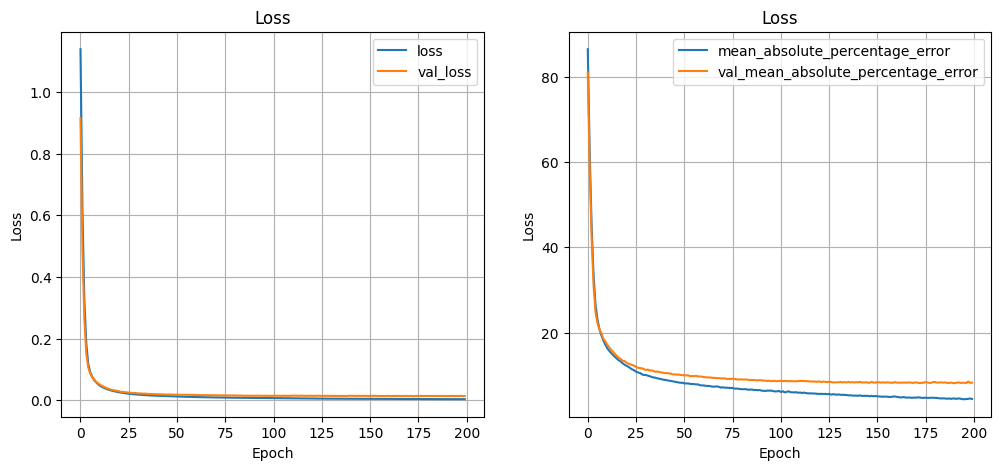

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

df[["loss", "val_loss"]].plot(
    ax=axes[0], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

df[["mean_absolute_percentage_error", "val_mean_absolute_percentage_error"]].plot(
    ax=axes[1], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

In [9]:
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

5/5 [==============================] - 0s 1000us/step


,MSE Train,MSE Test,R2 Train,R2 Test
0,0.005476,0.011974,0.869537,0.708064


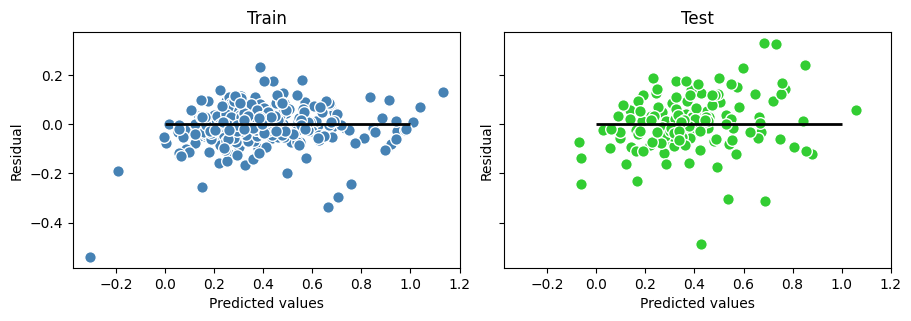

In [10]:
fig, ax = plt.subplots(
    1, 2, figsize=(9, 5), constrained_layout=True, sharex=True, sharey=True
)
res_plot(ax=ax[0], y_pred=y_train_pred, y=y_train_scaled, title="Train")
res_plot(ax=ax[1], y_pred=y_test_pred, y=y_test_scaled, title="Test", color="limegreen")
ax[0].set_xlabel("Predicted values")
ax[0].set_ylabel("Residual")
ax[1].set_xlabel("Predicted values")
ax[1].set_ylabel("Residual")

results = []

df = store_results(
    results=results,
    y_train=y_train_scaled,
    y_train_pred=y_train_pred,
    y_test=y_test_scaled,
    y_test_pred=y_test_pred,
)

results_df = pd.DataFrame(results)

display(results_df)